In [1]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
yf.pdr_override()
from datetime import datetime
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import data_util

In [2]:
s_stocks=data_util.stock_data('SPY',4,'SPY')
# plot(apple_stocks,'Apple')  

[*********************100%%**********************]  1 of 1 completed


In [3]:
stocks = s_stocks[['Close']].copy()

In [4]:
test_Results=adfuller(stocks["Close"])
print("p-value of the Test",test_Results[1])

p-value of the Test 0.34509212656817134


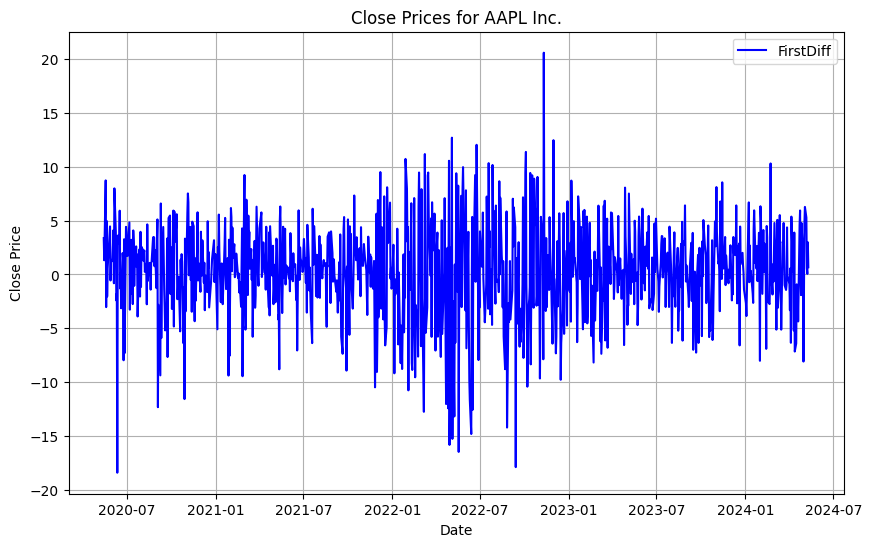

In [5]:
stocks['FirstDiff'] = stocks['Close'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(stocks.index, stocks['FirstDiff'], color='blue', label='FirstDiff')
plt.title(f'Close Prices for {"AAPL"} Inc.')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()  
plt.grid(True)
plt.show()

In [6]:
test_Results=adfuller(stocks["FirstDiff"][1:])#first entry will be Nan
print("p-value of the Test",test_Results[1])

p-value of the Test 0.0


In [7]:
from pmdarima.arima.utils import ndiffs

d = ndiffs(stocks["Close"])

print("No. of differences needed:", d)

No. of differences needed: 1


<BarContainer object of 30 artists>

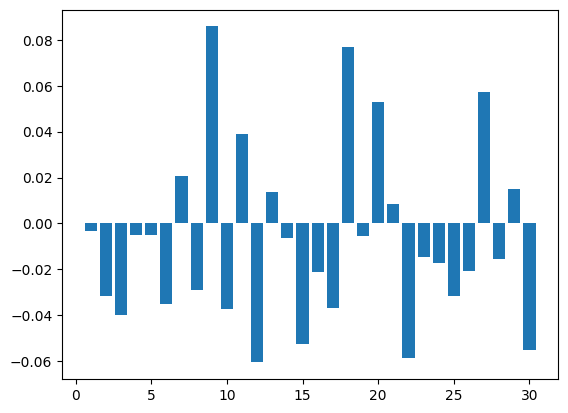

In [8]:
acf_vals = acf(stocks['FirstDiff'][1:])
plt.bar(range(1,acf_vals.shape[0]), acf_vals[1:acf_vals.shape[0]])
# acf_vals.shape

<BarContainer object of 30 artists>

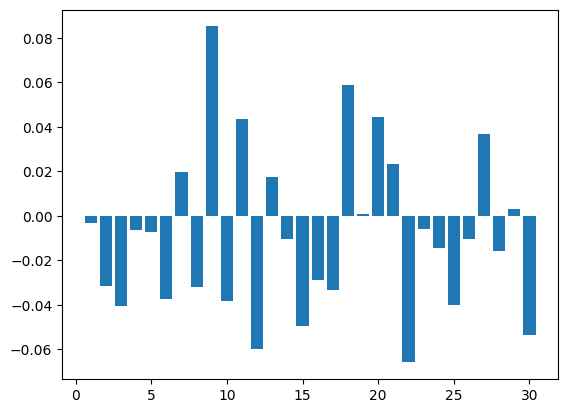

In [9]:
pacf_vals = pacf(stocks['FirstDiff'][1:])
plt.bar(range(1,pacf_vals.shape[0]), pacf_vals[1:pacf_vals.shape[0]])

In [10]:
train=pd.DataFrame(stocks['Close'][0:int(len(stocks)*0.70)])
test=pd.DataFrame(stocks['Close'][int(len(stocks)*0.70):])


In [11]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(train, order=(3,1,3))
# model = ARIMA(stocks['FirstDiff'][1:], order=(2,0,2))

model_fit = model.fit()
print(model_fit.summary())

c:\Users\baljyot\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\baljyot\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\baljyot\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\baljyot\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  704
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2088.386
Date:                Mon, 13 May 2024   AIC                           4190.773
Time:                        04:30:25   BIC                           4222.660
Sample:                             0   HQIC                          4203.097
                                - 704                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2178      0.120      1.812      0.070      -0.018       0.454
ar.L2         -0.3445      0.083     -4.148      0.000      -0.507      -0.182
ar.L3          0.8847      0.116      7.606      0.0

c:\Users\baljyot\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(array([0.00257652, 0.00404882, 0.01325067, 0.04085624, 0.08833781,
        0.07729558, 0.02576519, 0.00625726, 0.        , 0.00036807]),
 array([-18.08223813, -14.21759578, -10.35295343,  -6.48831108,
         -2.62366872,   1.24097363,   5.10561598,   8.97025833,
         12.83490069,  16.69954304,  20.56418539]),
 <BarContainer object of 10 artists>)

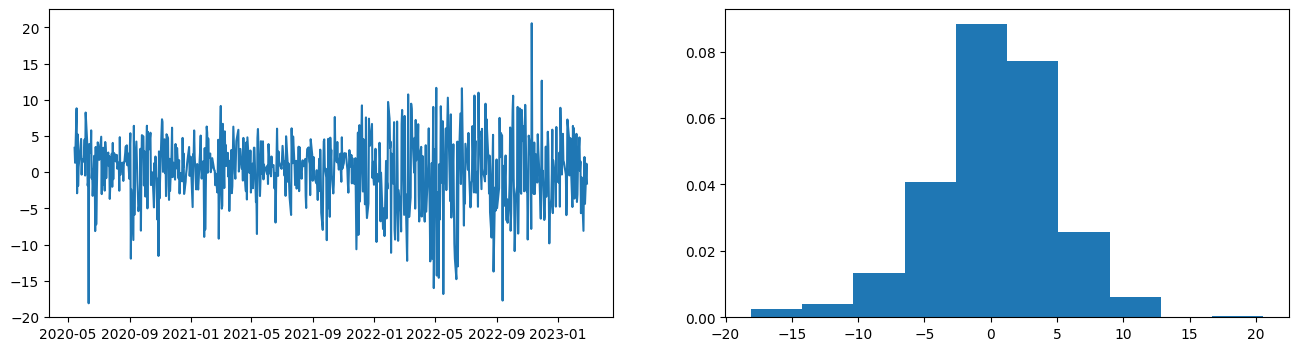

In [12]:
residuals = pd.DataFrame(model_fit.resid[1:])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)

ax2.hist(residuals, density=True)

In [13]:
predictions = model_fit.forecast(len(test))

dates = test.index.tolist()  # Convert index to list of dates
predictions = predictions.tolist()  # Convert predicted values to list

# Create a DataFrame using the lists of dates and predictions
predicted_df = pd.DataFrame({'Predicted_Value': predictions}, index=dates)

# Print the DataFrame
print(predicted_df)



            Predicted_Value
2023-03-01       396.376119
2023-03-02       396.533570
2023-03-03       396.645313
2023-03-06       396.718137
2023-03-07       396.834803
...                     ...
2024-05-06       397.771474
2024-05-07       397.771893
2024-05-08       397.771361
2024-05-09       397.771321
2024-05-10       397.771866

[302 rows x 1 columns]


c:\Users\baljyot\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\baljyot\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


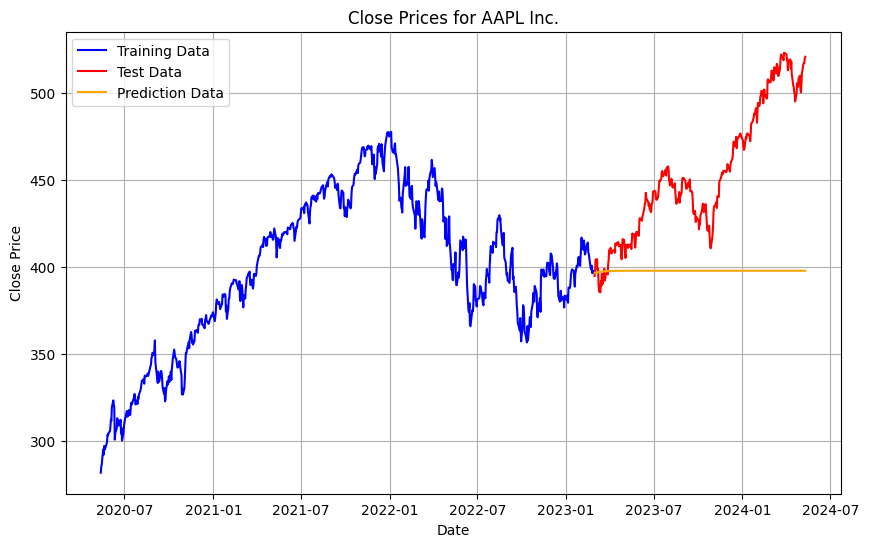

In [14]:
plt.figure(figsize=(10, 6))

# Plot training data
plt.plot(train.index, train, color='blue', label='Training Data')

# Plot test data
plt.plot(test.index, test, color='red', label='Test Data')
plt.plot(predicted_df.index, predicted_df, color='orange', label='Prediction Data')

plt.title('Close Prices for AAPL Inc.')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import warnings
warnings.filterwarnings("ignore")
rolling=int(len(stocks)*0.70)
train=pd.DataFrame(stocks['Close'][0:rolling])
test=pd.DataFrame(stocks['Close'][rolling:])
predictions_rolling=[]
for i in range(len(test)):

    model = ARIMA(train, order=(2,1,2))
    model_fit = model.fit()
    pred=model_fit.forecast()
    predictions_rolling.append(pred)
    print(float(pred),test['Close'][i])
    rolling+=1
    train=pd.DataFrame(stocks['Close'][0:rolling])
print(predictions_rolling)

396.38317836982446 394.739990234375
394.8745075936889 397.80999755859375
397.8947743911044 404.19000244140625
404.14695007122583 404.4700012207031
404.41230673049245 398.2699890136719
398.3035096517968 398.9200134277344
398.9921870223168 391.55999755859375
391.74527029766585 385.9100036621094
386.48709519197513 385.3599853515625
385.6336564368113 391.7300109863281
391.97927351474715 389.2799987792969
389.4505720367603 396.1099853515625
396.63389343965275 389.989990234375
390.1248667097778 393.739990234375
394.4340578402604 398.9100036621094
398.3251535970222 392.1099853515625
392.5357792597073 393.1700134277344
392.876565037856 395.75
396.032126070444 396.489990234375
396.0811520429886 395.6000061035156
395.84373629588174 401.3500061035156
401.0734535343461 403.70001220703125
403.68917855358114 409.3900146484375
409.07354687131226 410.95001220703125
410.7164535854078 408.6700134277344
408.32685572028925 407.6000061035156
407.4991848239641 409.19000244140625
408.94413394922157 409.60998

In [16]:
predictions_rolling=[float(i) for i in predictions_rolling]

In [17]:

dates = test.index.tolist()

rolling_predicted_df = pd.DataFrame({'Predicted_Value': predictions_rolling}, index=dates)

# Print the DataFrame
print(rolling_predicted_df)


            Predicted_Value
2023-03-01       396.383178
2023-03-02       394.874508
2023-03-03       397.894774
2023-03-06       404.146950
2023-03-07       404.412307
...                     ...
2024-05-06       511.647748
2024-05-07       516.772584
2024-05-08       517.101519
2024-05-09       516.929665
2024-05-10       519.761760

[302 rows x 1 columns]


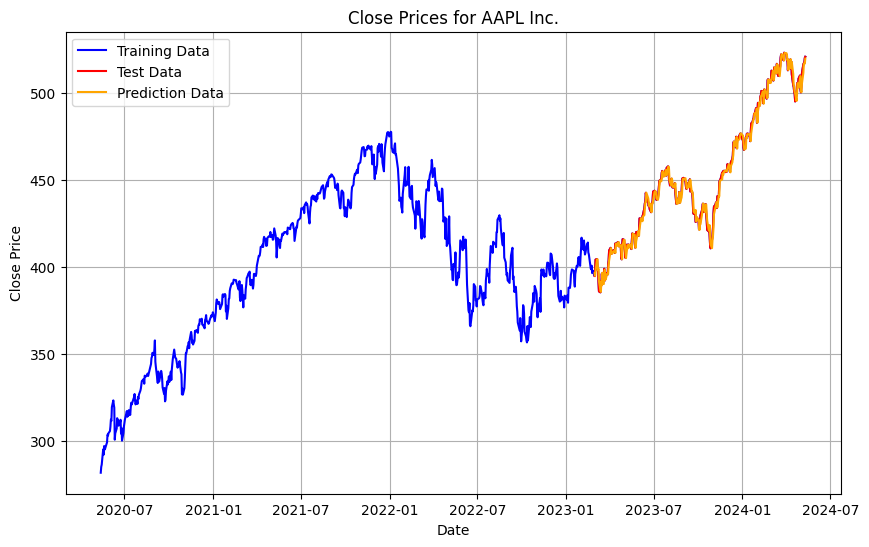

In [18]:
plt.figure(figsize=(10, 6))

# Plot training data
plt.plot(train.index, train, color='blue', label='Training Data')

# Plot test data
plt.plot(test.index, test, color='red', label='Test Data')
plt.plot(rolling_predicted_df.index, rolling_predicted_df, color='orange', label='Prediction Data')

plt.title('Close Prices for AAPL Inc.')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
from Evaluation_metrics import *
def evaluate_metrics(y_true, y_pred):
    results = {
        'Metric': ['MAPE', 'MAE', 'MSE', 'RMSE', 'R2', 'SMAPE'],
        'Value': [MAPE(y_true, y_pred), 
                  MAE(y_true, y_pred), 
                  MSE(y_true, y_pred), 
                  RMSE(y_true, y_pred), 
                  R2(y_true, y_pred), 
                  SMAPE(y_true, y_pred)]
    }
    df = pd.DataFrame(results)
    
    # Add dotted lines
    dotted_style = [dict(selector="th", props=[("border-bottom", "1px dotted #aaaaaa")]),
                    dict(selector="td", props=[("border-bottom", "1px dotted #aaaaaa")])]
    
    # Apply styling
    styled_df = (df.style
                 .set_properties(**{'text-align': 'center'})
                 .format({'Value': '{:.2f}'})  # Round values to 2 decimal places
                 .set_table_styles(dotted_style)
                 .set_caption('Evaluation Metrics')
                 .set_table_attributes('style="border-collapse: collapse; border: none;"')
                 .set_properties(subset=['Metric'], **{'font-weight': 'bold',}))  # Bold and blue headers
    
    return styled_df

In [24]:
y_true=test["Close"].values
y_pred=rolling_predicted_df["Predicted_Value"].values
styled_df = evaluate_metrics(y_true, y_pred)
styled_df

,Metric,Value
0,MAPE,0.61
1,MAE,2.72
2,MSE,11.99
3,RMSE,3.46
4,R2,0.99
5,SMAPE,0.61
